In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/sms-spam-collection-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [3]:
import numpy as np
import pandas as pd
import re
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Manually defined stopwords list to avoid nltk download error in Kaggle
stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
    "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
    'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
    'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
    'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
    'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was',
    'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do',
    'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or',
    'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with',
    'about', 'against', 'between', 'into', 'through', 'during', 'before',
    'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once',
    'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both',
    'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor',
    'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't',
    'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now',
    'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn',
    "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't",
    'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
    "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't",
    'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won',
    "won't", 'wouldn', "wouldn't"
])

# Load dataset
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Text preprocessing
ps = PorterStemmer()

def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text.lower())
    words = [ps.stem(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

df['processed'] = df['message'].apply(clean_text)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['processed']).toarray()
y = df['label'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear')
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, predictions):.4f}")
    print(classification_report(y_test, predictions))



Naive Bayes Results:
Accuracy: 0.9749
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.90       150

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115


Logistic Regression Results:
Accuracy: 0.9561
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.96      0.70      0.81       150

    accuracy                           0.96      1115
   macro avg       0.96      0.85      0.89      1115
weighted avg       0.96      0.96      0.95      1115


SVM Results:
Accuracy: 0.9794
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro av

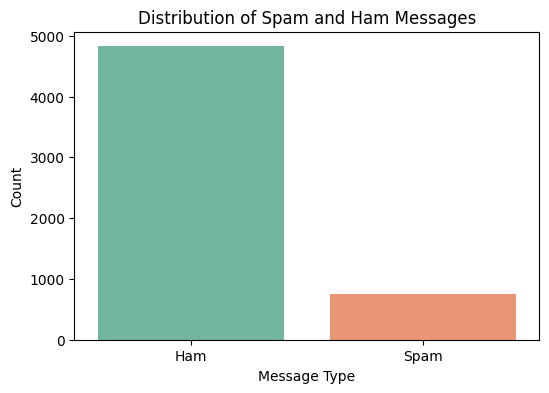

In [4]:
# Visualization 1: Distribution of Spam vs Ham Messages
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of Spam vs Ham
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='Set2')
plt.title('Distribution of Spam and Ham Messages')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()


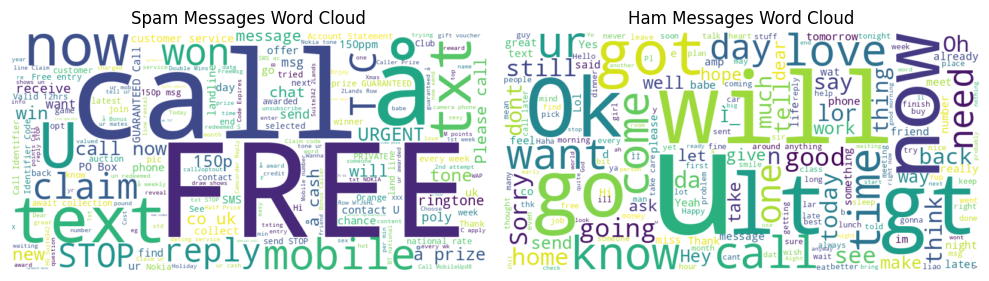

In [5]:
# Visualization 2: Word Cloud for Spam and Ham Messages
from wordcloud import WordCloud

# Separate spam and ham messages
spam_messages = df[df['label'] == 1]['message'].values
ham_messages = df[df['label'] == 0]['message'].values

# Create word clouds
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam_messages))
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(ham_messages))

# Plot word clouds
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Messages Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Messages Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()


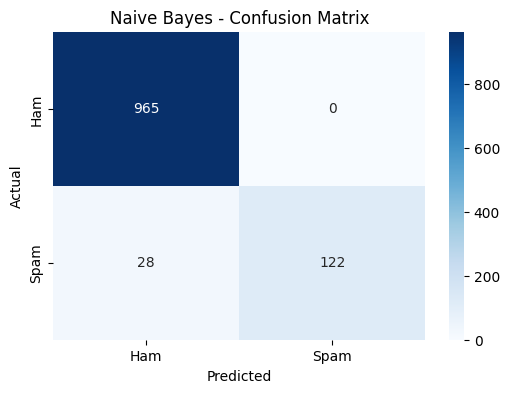

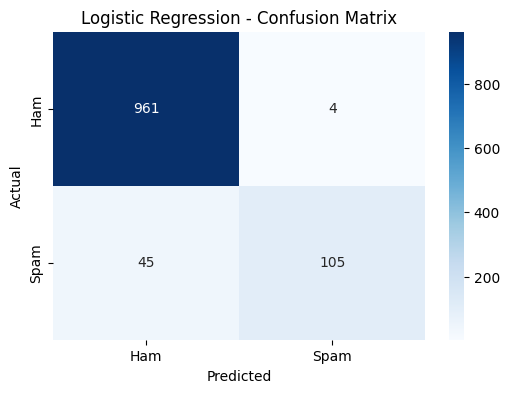

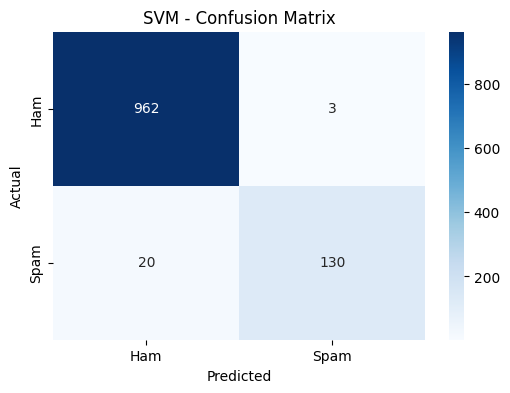

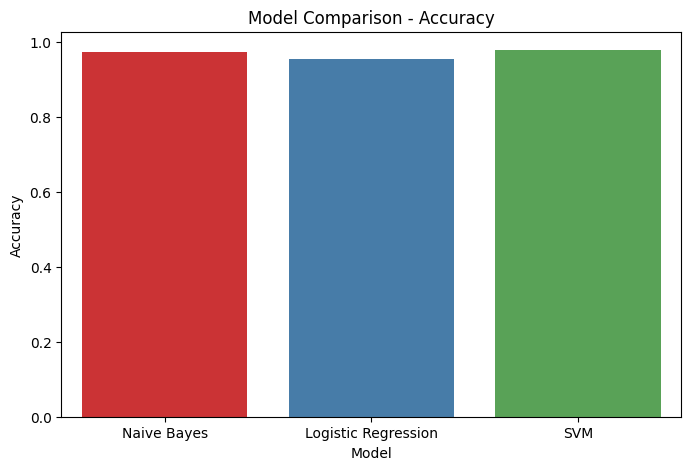

In [7]:
# Visualization 3: Model Performance Comparison and Confusion Matrix
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import pandas as pd

# Store accuracy of models
model_names = []
model_accuracies = []

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    model_names.append(name)
    model_accuracies.append(accuracy)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Convert the model names and accuracies to a DataFrame
model_performance = pd.DataFrame({
    'Model': model_names,
    'Accuracy': model_accuracies
})

# Plot the model comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=model_performance, palette='Set1')
plt.title('Model Comparison - Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()
